In [11]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [18]:
seed = 7
np.random.seed(seed)

N = 1000
X_train = np.linspace(0.0,1.0,N)
y_train = np.sin(2*np.pi*X_train)

X_val = np.random.rand(100)
X_val = np.sort(X_val)
y_val = np.sin(2*np.pi * X_val)

Text(0.5, 1.0, 'Training and validation Data')

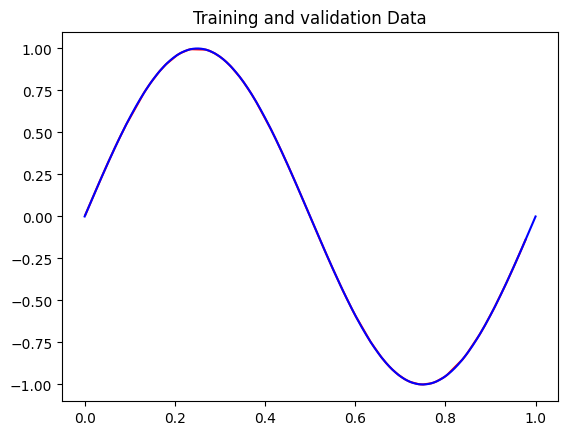

In [19]:
plt.plot(X_val , y_val , 'r-')

plt.plot(X_train , y_train , 'b-')
plt.title('Training and validation Data')

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(32, input_dim = 1,activation="sigmoid", name="layer1"),
        layers.Dense(16, activation="sigmoid", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)


In [21]:

model.compile(optimizer = 'Adam', loss = 'mse' , metrics = ['mse'])

In [23]:
#model.fit(X_train, y_train , epochs = 350 , batch_size = 32 , validation_data = (X_val , y_val))
model.fit(X_train, y_train , epochs = 200 , batch_size = 16 , validation_data = (X_val , y_val), verbose = 1)

Epoch 1/200
63/63 [==============================] - 2s 24ms/step - loss: 0.5097 - mse: 0.5097 - val_loss: 0.4763 - val_mse: 0.4763
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4849 - mse: 0.4849 - val_loss: 0.4603 - val_mse: 0.4603
Epoch 3/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4688 - mse: 0.4688 - val_loss: 0.4459 - val_mse: 0.4459
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4510 - mse: 0.4510 - val_loss: 0.4284 - val_mse: 0.4284
Epoch 5/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.4058 - val_mse: 0.4058
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.3804 - val_mse: 0.3804
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 0.3751 - mse: 0.3751 - val_loss: 0.3508 - val_mse: 0.3508
Epoch 8/200
63/63 [==============================] - 0s 3ms/step - loss: 0.3451 - 

In [24]:
X_val = tf.Variable(X_val.reshape([-1,1]))
with tf.GradientTape() as tape :
    y = model(X_val) 

In [25]:
grad = tape.gradient(y, X_val)

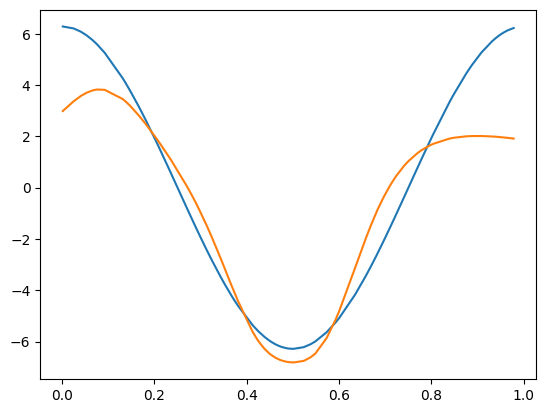

In [26]:
plt.plot(X_val, 2*np.pi*np.cos(2*np.pi*X_val))
plt.plot(X_val, grad)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def train_step():
    with tf.GradientTape(persistent=True) as tape:
        X_train_1 = tf.cast(X_train, tf.float32)  # Ensure X_train is float32
        y = model(X_train_1)
        pi = tf.constant(np.pi, dtype=tf.float32)
        loss = tf.reduce_mean(tf.square(tf.sin(2 * pi * X_train_1) - y))
        grad = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grad, model.trainable_variables))
    
    return loss

In [29]:
X_train = X_train.reshape([-1,1])


In [30]:
X_train = tf.Variable(X_train)

In [31]:
losses = []
for i in range(5000):
    loss = train_step()
    losses.append(loss)
    print("loss", loss.numpy())

loss 0.010786013
loss 0.010611032
loss 0.010678405
loss 0.01050885
loss 0.010411563
loss 0.010439681
loss 0.0104260845
loss 0.0103263445
loss 0.010234873
loss 0.010196957
loss 0.010181284
loss 0.010133349
loss 0.010057342
loss 0.009983117
loss 0.00994099
loss 0.009908909
loss 0.009858097
loss 0.009786519
loss 0.00972042
loss 0.009669576
loss 0.009627303
loss 0.009572002
loss 0.009506607
loss 0.009445449
loss 0.009390044
loss 0.009341966
loss 0.009285477
loss 0.00922376
loss 0.009161515
loss 0.009105372
loss 0.009053368
loss 0.008996489
loss 0.008934624
loss 0.008874233
loss 0.008818211
loss 0.008761504
loss 0.008702382
loss 0.00864225
loss 0.008583616
loss 0.008526436
loss 0.008469131
loss 0.008408503
loss 0.008350176
loss 0.008293425
loss 0.008234003
loss 0.008177309
loss 0.008117376
loss 0.008059165
loss 0.008001168
loss 0.007944536
loss 0.007884846
loss 0.007826953
loss 0.0077699996
loss 0.0077130566
loss 0.007653919
loss 0.007597707
loss 0.0075411582
loss 0.0074823936
loss 0.007427

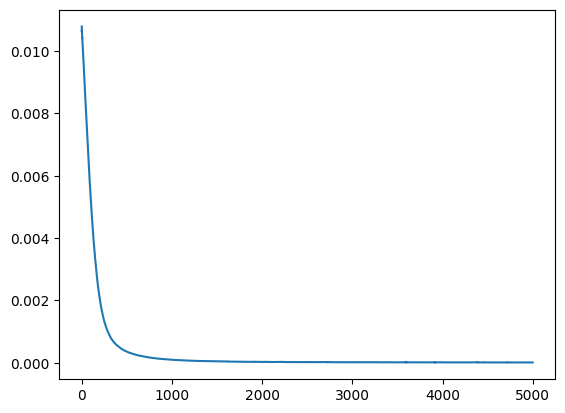

In [32]:
plt.plot(losses)

In [43]:
N = 36
X_train = np.linspace(0.0,1.0,N)



In [44]:
X_train = X_train.reshape([-1,1])
X_train = tf.Variable(X_train)

In [45]:
# Define Sequential model with 3 layers
model_1 = keras.Sequential(
    [
        layers.Dense(32, input_dim = 1,activation="tanh", name="layer1"),
        layers.Dense(16, activation="tanh", name="layer2"),
        layers.Dense(1, name="layer3"),
    ]
)

In [46]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def train_step():
    with tf.GradientTape(persistent=True) as tape:
        X_train_1 = tf.cast(X_train, tf.float32)  # Ensure X_train is float32
        y = model_1(X_train_1)
        model_prime = tape.gradient(y, X_train_1)
        loss = tf.reduce_mean(tf.square(model_prime - y)) + (y[0]-1)**2
        grad = tape.gradient(loss, model_1.trainable_variables)
        optimizer.apply_gradients(zip(grad, model_1.trainable_variables))
    
    return loss

In [47]:
losses = []
for i in range(5000):
    loss = train_step()
    losses.append(loss)
    print("loss", loss.numpy())

loss [1.0036422]
loss [0.9702803]
loss [0.94044435]
loss [0.912475]
loss [0.8849122]
loss [0.85732263]
loss [0.8298454]
loss [0.8026069]
loss [0.77567506]
loss [0.7492737]
loss [0.7233313]
loss [0.6979278]
loss [0.67304957]
loss [0.6486839]
loss [0.6249547]
loss [0.6018062]
loss [0.57926327]
loss [0.5573935]
loss [0.53626454]
loss [0.5159274]
loss [0.49634987]
loss [0.47764736]
loss [0.45990318]
loss [0.44309065]
loss [0.4271343]
loss [0.41231993]
loss [0.39853457]
loss [0.3855881]
loss [0.3738886]
loss [0.36314404]
loss [0.3534196]
loss [0.3445648]
loss [0.33678025]
loss [0.32990596]
loss [0.3238191]
loss [0.31851017]
loss [0.31402427]
loss [0.31007308]
loss [0.3067354]
loss [0.30374604]
loss [0.30127257]
loss [0.2991573]
loss [0.29726237]
loss [0.29551637]
loss [0.29373428]
loss [0.2921534]
loss [0.2905539]
loss [0.28901097]
loss [0.2874555]
loss [0.285873]
loss [0.2842884]
loss [0.28251657]
loss [0.28094563]
loss [0.2791983]
loss [0.2775989]
loss [0.2759249]
loss [0.2745757]
loss [0

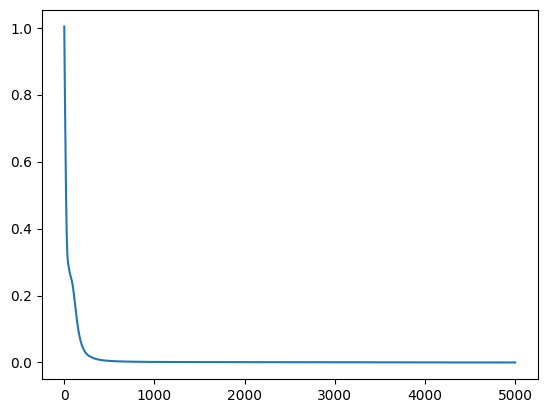

In [48]:
plt.plot(losses)

In [64]:
X_val = np.linspace(0.0,1.0,200)
X_val = X_val.reshape([-1,1])
#X_val = tf.Variable(X_val)

In [65]:
predicted_values = model_1(X_val)

In [66]:
predicted_values


<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[0.99969935],
       [1.0048822 ],
       [1.0097003 ],
       [1.0150445 ],
       [1.0202917 ],
       [1.0251454 ],
       [1.0299829 ],
       [1.0355108 ],
       [1.0407026 ],
       [1.045993  ],
       [1.0508791 ],
       [1.056478  ],
       [1.0613307 ],
       [1.0670332 ],
       [1.0729266 ],
       [1.0773441 ],
       [1.0832704 ],
       [1.0891379 ],
       [1.0938989 ],
       [1.0996099 ],
       [1.1053694 ],
       [1.110859  ],
       [1.1167924 ],
       [1.1217893 ],
       [1.1275946 ],
       [1.1330377 ],
       [1.1386976 ],
       [1.1444892 ],
       [1.1507417 ],
       [1.1562699 ],
       [1.1629146 ],
       [1.1686453 ],
       [1.174225  ],
       [1.1797919 ],
       [1.1861758 ],
       [1.1924971 ],
       [1.1981496 ],
       [1.2040373 ],
       [1.2105695 ],
       [1.2160038 ],
       [1.2222933 ],
       [1.2291771 ],
       [1.2353563 ],
       [1.2409157 ],
       [1.2478044 ],
     

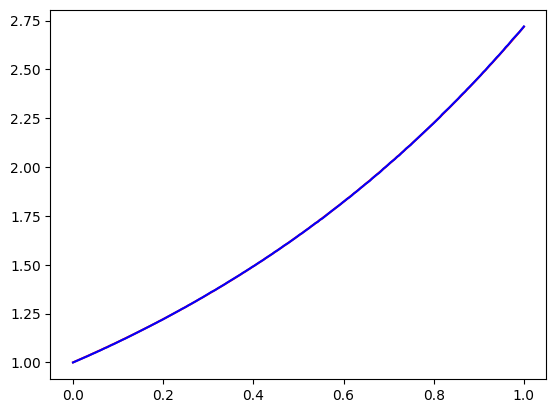

In [67]:
plt.plot(X_val, np.exp(X_val), 'r-')
plt.plot(X_val, predicted_values, 'b-')

In [69]:
tf.reduce_mean(tf.square(predicted_values - np.exp(X_val))).numpy()

7.5645306e-07